<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/yfinance/List4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q yfinance
!pip install -q hurst
!pip install -q nolds

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from scipy.stats import entropy, kurtosis
import hurst
from nolds import corr_dim, hurst_rs
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize, Normalizer

Generowanie danych


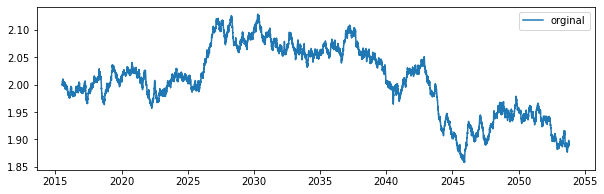

0.5014051736351436


In [ ]:
N = 9999
scalar = 10

t = pd.date_range('2015-07-01', periods=N, freq=BDay())

random_changes = 1. + np.random.randn(N) / 1000.
raw_x = np.cumprod(random_changes)*2  # create a random walk from random changes
x = pd.Series(raw_x, index=t)

pp = hurst.compute_Hc(x, kind='price', simplified=True)

plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

print(pp[0])

# Zad 1
Wersja biblioteczna

In [ ]:
x.describe()

count    9999.000000
mean        2.007391
std         0.061397
min         1.858280
25%         1.960950
50%         2.009603
75%         2.059412
max         2.128416
dtype: float64

In [ ]:
print(kurtosis(x))

-0.7991762758643866


# Zad 2

In [ ]:
E = entropy(x)
print(E)

9.20908002008397


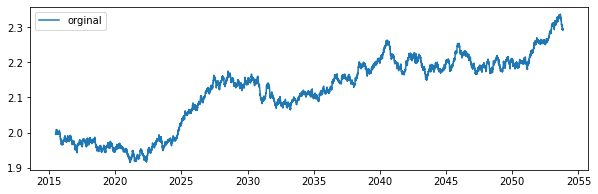

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

In [ ]:
print(hurst.compute_Hc(x)[0])

0.5381253154345759


In [ ]:
print(corr_dim(x, 1))

0.8800991506455187


# Zad 3


Dla zadania 1


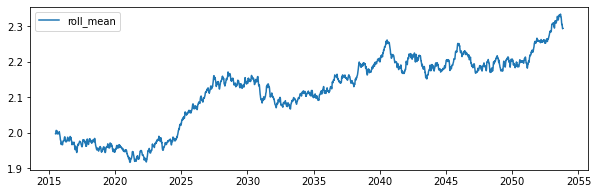

In [ ]:
roll_mean = x.rolling(7).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

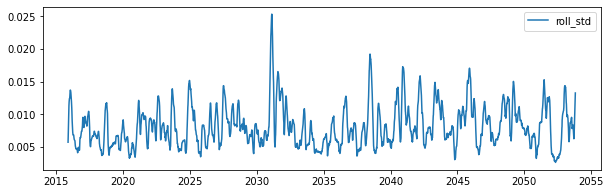

In [ ]:
roll_std = x.rolling(100).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

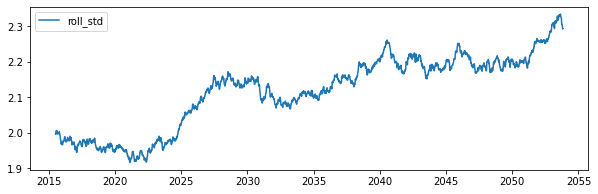

In [ ]:
roll_median = x.rolling(7).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

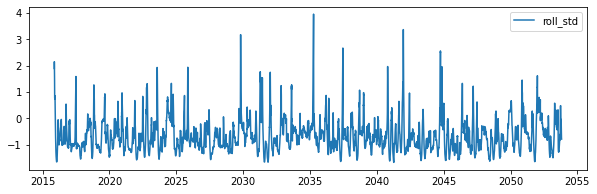

In [ ]:
roll_kurtosis = x.rolling(100).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

Do zadania 2

In [ ]:
def entopy_base_2(data):
    return entropy(data)

In [ ]:
def first_hurst(data):
    return hurst.compute_Hc(data)[0]

In [ ]:
def fractal_dim(data):
    return corr_dim(data, 1)

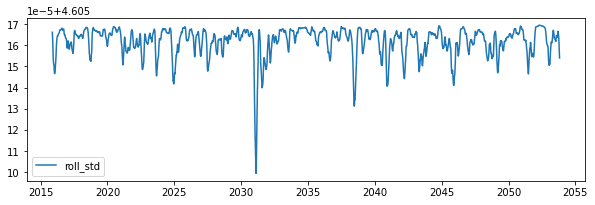

In [ ]:
roll_entropy = x.rolling(100).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

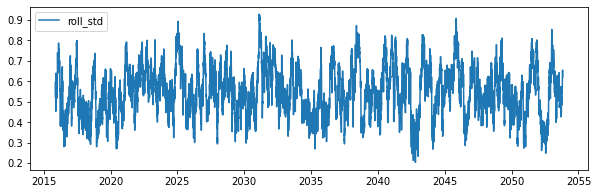

In [ ]:
roll_hurst = x.rolling(100).apply(first_hurst)

plt.figure(figsize=(10,3))
plt.plot(t, roll_hurst, label='roll_std')
plt.legend()
plt.show()

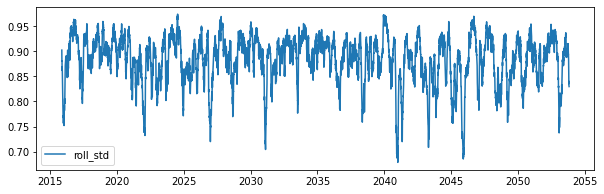

In [ ]:
roll_fractal = x.rolling(100).apply(fractal_dim)

plt.figure(figsize=(10,3))
plt.plot(t, roll_fractal, label='roll_std')
plt.legend()
plt.show()

# Zad 4

Normalized


In [ ]:
raw_x = raw_x.reshape(-1, 1)
normalized = normalize(raw_x, norm='l2')
# print(normalized)
print(raw_x)

[[1.99827913]
 [1.99648265]
 [1.99586814]
 ...
 [2.29644951]
 [2.29506035]
 [2.29224945]]


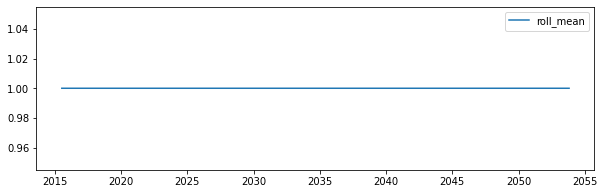

In [ ]:
normalized = pd.DataFrame(normalized)

roll_mean = normalized.rolling(7).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

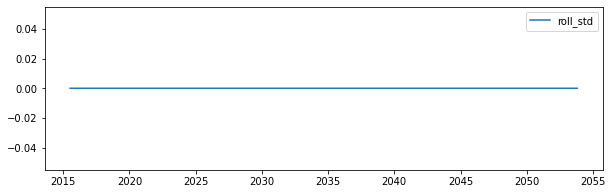

In [ ]:
roll_std = normalized.rolling(7).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

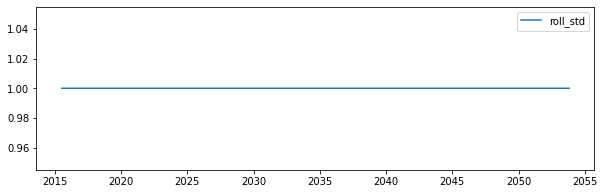

In [ ]:
roll_median = normalized.rolling(7).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/core/window/rolling.py:1342: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return window_func(values, begin, end, min_periods)


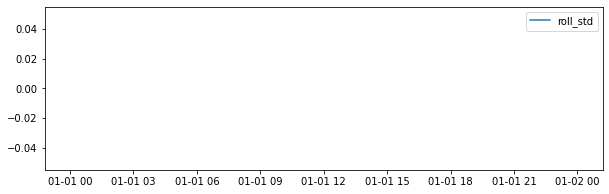

In [ ]:
roll_kurtosis = normalized.rolling(7).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

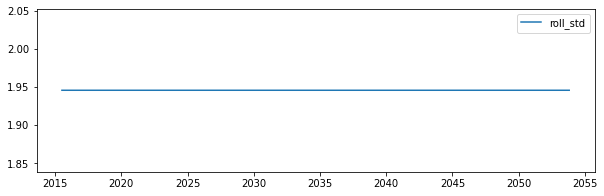

In [ ]:
roll_entropy = normalized.rolling(7).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

Scaled


In [ ]:
scaler = StandardScaler()
raw_x = raw_x.reshape(-1, 1)
stand = scaler.fit_transform(raw_x)

stand = pd.DataFrame(stand)

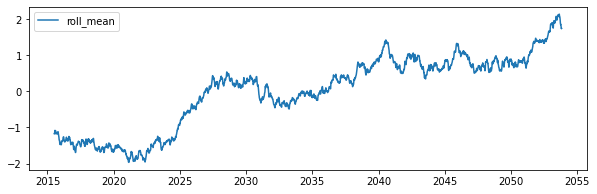

In [ ]:
roll_mean = stand.rolling(7).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

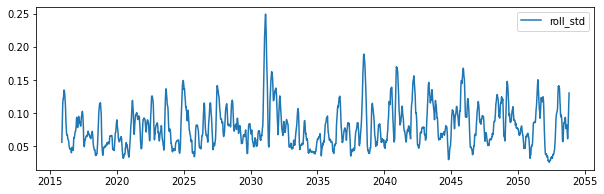

In [ ]:
roll_std = stand.rolling(100).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

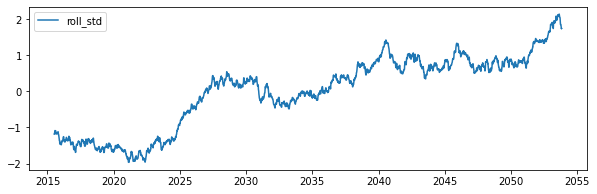

In [ ]:
roll_median = stand.rolling(7).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

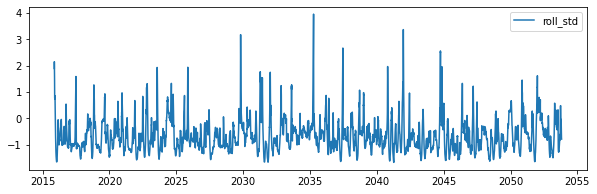

In [ ]:
roll_kurtosis = stand.rolling(100).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

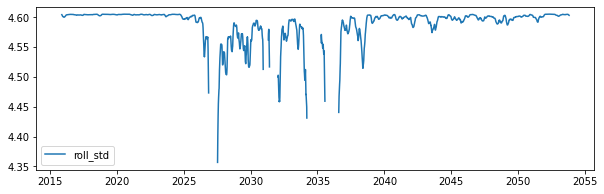

             0
0    -1.168697
1    -1.186377
2    -1.192424
3    -1.187436
4    -1.202082
...        ...
9994  1.739262
9995  1.779750
9996  1.765696
9997  1.752025
9998  1.724362

[9999 rows x 1 columns]


In [ ]:
roll_entropy = stand.rolling(100).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

print(pd.DataFrame(stand))

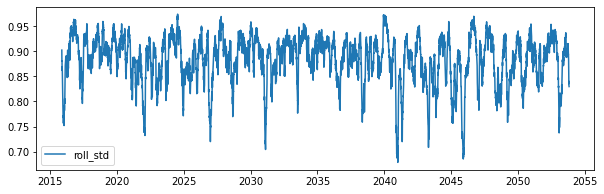

In [ ]:
roll_fractal = stand.rolling(100).apply(fractal_dim)

plt.figure(figsize=(10,3))
plt.plot(t, roll_fractal, label='roll_std')
plt.legend()
plt.show()